In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


def animate_optimizers(
    loss_fn,
    gradient_fn,
    initial_params=np.array([-2.0, 0.0001]),
    num_iterations=200,
    learning_rate=0.1,
):
    """
    Creates an animated 3D plot showing the optimization paths of SGD, RMSProp, and Adam
    on a saddle function using Matplotlib.
    """
    # Define the saddle function and its gradient

    # Define the optimizers
    def sgd(params, grads, lr):
        return params - lr * grads

    def rmsprop(params, grads, cache, lr=0.1, beta=0.9, epsilon=1e-8):
        cache = beta * cache + (1 - beta) * (grads**2)
        params = params - lr * grads / (np.sqrt(cache) + epsilon)
        return params, cache

    def adam(params, grads, m, v, t, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
        m = beta1 * m + (1 - beta1) * grads
        v = beta2 * v + (1 - beta2) * (grads**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        params = params - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        return params, m, v

    # Initialize parameters

    # Optimization settings

    # Initialize paths for plotting
    path_sgd = [initial_params.copy()]
    path_rmsprop = [initial_params.copy()]
    path_adam = [initial_params.copy()]

    # Initialize RMSProp and Adam variables
    cache_rmsprop = np.zeros_like(initial_params)
    m_adam = np.zeros_like(initial_params)
    v_adam = np.zeros_like(initial_params)

    # Current parameters
    params_sgd = initial_params.copy()
    params_rmsprop = initial_params.copy()
    params_adam = initial_params.copy()

    # Run optimization and record paths
    for t in range(1, num_iterations + 1):
        # Compute gradients
        grads_sgd = gradient_fn(params_sgd)
        grads_rmsprop = gradient_fn(params_rmsprop)
        grads_adam = gradient_fn(params_adam)

        # Update parameters using SGD
        params_sgd = sgd(params_sgd, grads_sgd, learning_rate)
        path_sgd.append(params_sgd.copy())

        # Update parameters using RMSProp
        params_rmsprop, cache_rmsprop = rmsprop(
            params_rmsprop, grads_rmsprop, cache_rmsprop, lr=learning_rate
        )
        path_rmsprop.append(params_rmsprop.copy())

        # Update parameters using Adam
        params_adam, m_adam, v_adam = adam(
            params_adam, grads_adam, m_adam, v_adam, t, lr=learning_rate
        )
        path_adam.append(params_adam.copy())

    # Convert paths to NumPy arrays
    path_sgd = np.array(path_sgd)
    path_rmsprop = np.array(path_rmsprop)
    path_adam = np.array(path_adam)

    # Compute loss for each path
    loss_sgd = loss_fn(path_sgd.T)
    loss_rmsprop = loss_fn(path_rmsprop.T)
    loss_adam = loss_fn(path_adam.T)

    # Create a meshgrid for the loss surface
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = loss_fn([X, Y])

    # Set up the figure and 3D axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the loss surface
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor="none")

    # Initialize lines for each optimizer
    (line_sgd,) = ax.plot([], [], [], marker="o", color="red", label="SGD")
    (line_rmsprop,) = ax.plot([], [], [], marker="^", color="orange", label="RMSProp")
    (line_adam,) = ax.plot([], [], [], marker="x", color="blue", label="Adam")

    # Highlight starting and saddle points
    ax.scatter(
        initial_params[0],
        initial_params[1],
        loss_fn(initial_params),
        color="green",
        s=100,
        label="Start",
    )
    ax.scatter(0, 0, loss_fn([0, 0]), color="black", s=100, label="Saddle Point")

    # Set labels and title
    ax.set_xlabel("X Parameter")
    ax.set_ylabel("Y Parameter")
    ax.set_zlabel("Loss")
    ax.set_title("Optimization Paths on Saddle Function: SGD vs. RMSProp vs. Adam")
    ax.legend()

    # Define the update function for animation
    def update(
        num, path_sgd, path_rmsprop, path_adam, line_sgd, line_rmsprop, line_adam
    ):
        """
        Update function for animation.

        Args:
            num (int): Current frame number.
            path_sgd (np.ndarray): Path taken by SGD.
            path_rmsprop (np.ndarray): Path taken by RMSProp.
            path_adam (np.ndarray): Path taken by Adam.
            line_sgd, line_rmsprop, line_adam: Line objects for each optimizer.

        Returns:
            list: Updated line objects.
        """
        # Update SGD line
        line_sgd.set_data(path_sgd[:num, 0], path_sgd[:num, 1])
        line_sgd.set_3d_properties(loss_sgd[:num])

        # Update RMSProp line
        line_rmsprop.set_data(path_rmsprop[:num, 0], path_rmsprop[:num, 1])
        line_rmsprop.set_3d_properties(loss_rmsprop[:num])

        # Update Adam line
        line_adam.set_data(path_adam[:num, 0], path_adam[:num, 1])
        line_adam.set_3d_properties(loss_adam[:num])

        return [line_sgd, line_rmsprop, line_adam]

    # Create the animation
    anim = FuncAnimation(
        fig,
        update,
        frames=num_iterations,
        fargs=(path_sgd, path_rmsprop, path_adam, line_sgd, line_rmsprop, line_adam),
        interval=500,
        blit=False,
        repeat=True,
    )

    plt.close(fig)
    return anim

In [31]:
anim = animate_optimizers(
    loss_fn=camel,
    gradient_fn=gradient_camel,
    initial_params=np.array([0.1, 1]),
    num_iterations=40,
    learning_rate=0.2
)
from IPython.display import HTML

HTML(anim.to_html5_video())

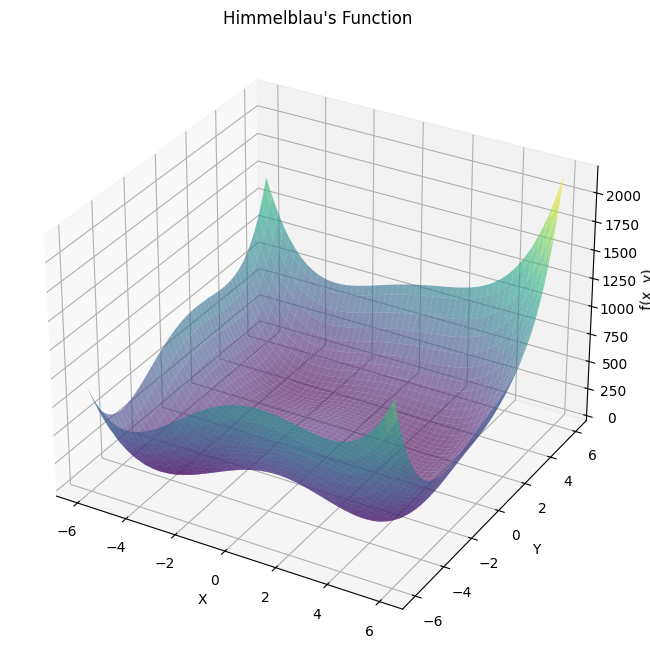

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Himmelblau's function definition
def himmelblau(params):
    x, y = params
    return (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2


# Gradient of Himmelblau's function
def gradient_himmelblau(params):
    x, y = params
    dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([dx, dy])


# Plotting Himmelblau's function
def plot_himmelblau_surface():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    x = np.linspace(-6, 6, 100)
    y = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x, y)
    Z = himmelblau([X, Y])

    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor="none")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(x, y)")
    ax.set_title("Himmelblau's Function")
    plt.show()


plot_himmelblau_surface()

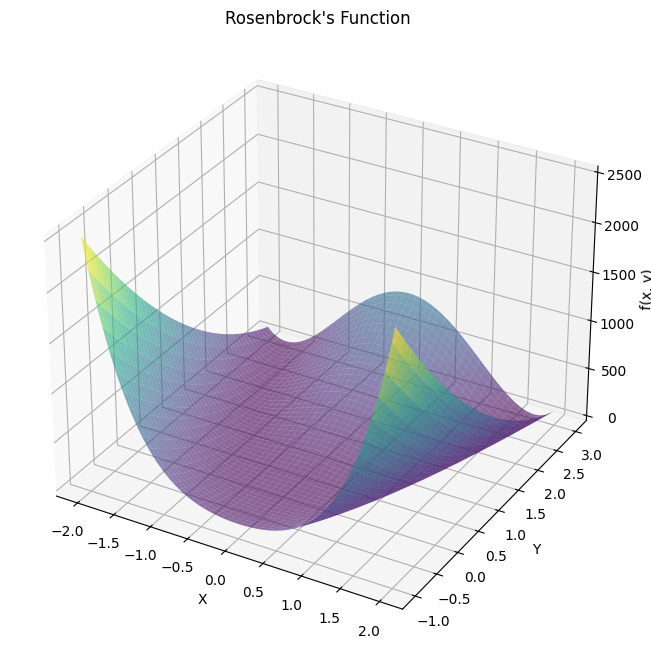

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Rosenbrock's function definition
def rosenbrock(params, a=1, b=100):
    x, y = params
    return (a - x) ** 2 + b * (y - x**2) ** 2


# Gradient of Rosenbrock's function
def gradient_rosenbrock(params, a=1, b=100):
    x, y = params
    dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dy = 2 * b * (y - x**2)
    return np.array([dx, dy])


# Plotting Rosenbrock's function surface
def plot_rosenbrock_surface():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor="none")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(x, y)")
    ax.set_title("Rosenbrock's Function")
    plt.show()


plot_rosenbrock_surface()

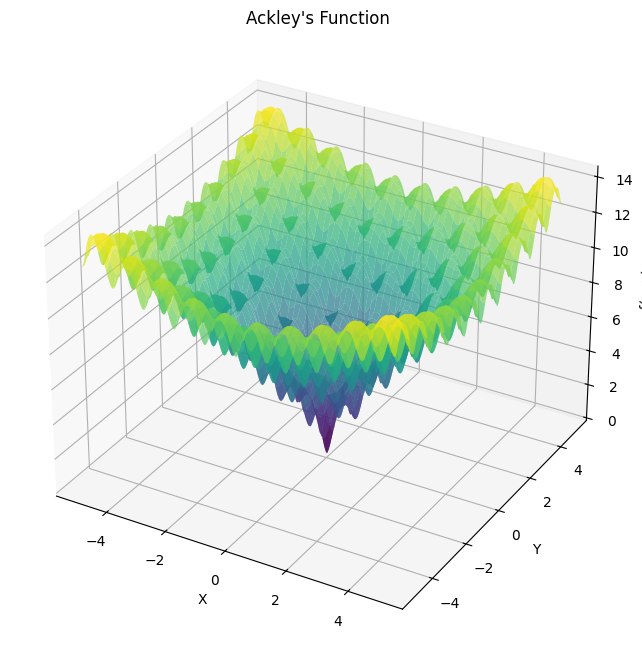

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Ackley's function definition
def ackley(x, y):
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + 20
        + np.e
    )


# Gradient of Ackley's function (numerical approximation for simplicity)
def gradient_ackley(params):
    x, y = params
    h = 1e-5  # Small step for numerical differentiation
    grad_x = (ackley(x + h, y) - ackley(x, y)) / h
    grad_y = (ackley(x, y + h) - ackley(x, y)) / h
    return np.array([grad_x, grad_y])


# Plotting Ackley's function surface
def plot_ackley_surface():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    Z = ackley(X, Y)

    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7, edgecolor="none")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(x, y)")
    ax.set_title("Ackley's Function")
    plt.show()


plot_ackley_surface()

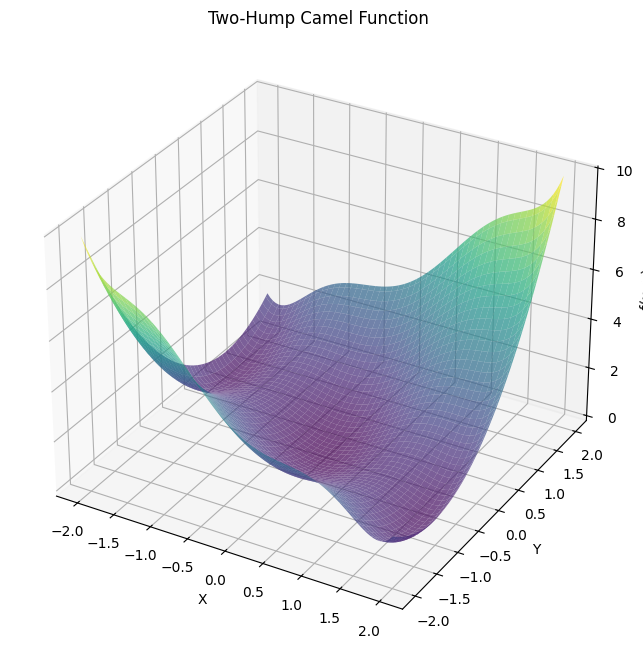

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Two-hump camel function definition
def camel(params):
    x, y = params
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2


# Gradient of the two-hump camel function
def gradient_camel(params):
    x, y = params
    dx = 4 * x - 4.2 * x**3 + x**5 + y
    dy = x + 2 * y
    return np.array([dx, dy])


# Plotting the two-hump camel function surface
def plot_camel_surface():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = camel([X, Y])

    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7, edgecolor="none")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(x, y)")
    ax.set_title("Two-Hump Camel Function")
    plt.show()


plot_camel_surface()